<a href="https://colab.research.google.com/github/delaneybrown23/the_bootstrap/blob/main/Delaney_Brown_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Part 1
df = pd.read_csv('mammogram.csv')
df.head()
#df['yes'] = 0
#df.loc[df['breast_cancer_death']=='yes', 'yes'] = 1

pd.crosstab(df['treatment'],df['breast_cancer_death'])

# The 25-year survival rate for the control group is 44405/44910 = 0.989.
# The 25-year survival rate for the mammogram group is 44425/44925 = 0.989.
# The survival rates are approximately the same for both groups, so there is essentially no difference.

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


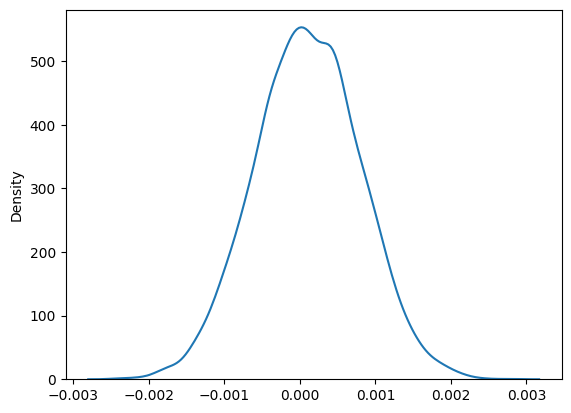

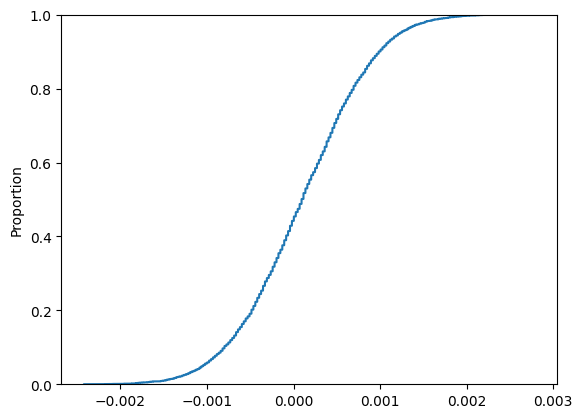

In [17]:
# Part 2 - Bootstrapping

#df.loc[df['breast_cancer_death']=='no','no']=0
#df.loc[df['breast_cancer_death']=='yes','yes']=1

#control_x = df.loc[df['treatment'] == 'control', 'breast_cancer_death'].mean()
#mammogram_x = df.loc[df['treatment'] == 'mammogram', 'breast_cancer_death'].mean()
#diff_x = control_x - mammogram_x

# trying to coerce to numeric
#df['breast_cancer_death'] = pd.to_numeric(df['breast_cancer_death'], errors='coerce')
#df['breast_cancer_death'] = float(df['breast_cancer_death'])

df['survive'] = 0
df.loc[df['breast_cancer_death'] == 'no', 'survive'] = 1

df_mammogram = df.loc[df['treatment'] == 'mammogram', :]
df_control = df.loc[df['treatment'] == 'control', :]

# Control
#df_control = df.loc[df['treatment'] == 'control,' :]
#N_control = df_control.shape[0]

# Mammogram
#df_mammogram = df.loc[df['treatment'] == 'mammogram,' :]
#N_mammogram = df_mammogram.shape[0]

# Simulation
#S = 100000

#rate_control = np.zeros(S)
#rate_mammogram = np.zeros(S)
#diff = np.zeros(S)

# Bootstrap
S = 5000
fx = []
for s in range(S):
  sample_mammogram = df_mammogram.sample(df_mammogram.shape[0],axis=0,replace=True)
  #rate_mammogram[s] = sample_mammogram.mean()
  sample_control = df_control.sample(df_control.shape[0],axis=0,replace=True)
  #rate_control[s] = sample_control.mean()
  #diff[s] = rate_control[s]-rate_mammogram[s]
  treatment_effect_sample = np.mean(sample_mammogram['survive']) - np.mean(sample_control['survive'])
  fx.append(treatment_effect_sample)

# Mammogram and control into one dataframe
#rdf_mammogram = pd.DataFrame({'treatment': 'mammogram','survival_rate':rate_mammogram})
#rdf_control = pd.DataFrame({'treatment': 'control','survival_rate':rate_control})
#rdf = pd.concat([rdf_mammogram,rdf_control],axis=0)

# Density plot
#sns.kdeplot(data=rdf,x='survival_rate',hue='treatment')
sns.kdeplot(fx)
plt.show()

# ECDF
#sns.ecdfplot(data=rdf,x='survival_rate',hue='treatment')
sns.ecdfplot(fx)
plt.show()

# Difference in treatment effects - density plot
#ax = sns.kdeplot(treatment_effect_sample)
#ax.axvline(x = treatment_effect_sample_0)
#plt.show()

In [18]:
# Part 3 - 99% confidence interval

#CI = np.quantile(treatment_effect_sample,[.005,.995])
#print('Point Estimate: ',treatment_effect_sample)
#print('CI: ' + str(CI))

# Density Plot
#ax = sns.kdeplot(treatment_effect_sample)
#ax.axvline(x = treatment_effect_sample,linestyle='dashed',color='green')
#ax.axvline(x = CI[0],linestyle='dashed',color='red')
#ax.axvline(x = CI[1],linestyle='dashed',color='red')
#plt.show()

# ECDF
#ax = sns.ecdfplot(treatment_effect_sample)
#ax.axvline(x = treatment_effect_sample,linestyle='dashed',color='green')
#ax.axvline(x = CI[0],linestyle='dashed',color='red')
#ax.axvline(x = CI[1],linestyle='dashed',color='red')
#plt.show()

level = 0.99
lower_bound = np.quantile(fx, .005)
upper_bound = np.quantile(fx, .995)
print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')')

# Yes, the 99% confidence interval does include 0, as the lower bound is about -0.002 and the upper bound is about 0.002.

99% confidence interval: ( -0.0017106797531252587 ,  0.00189630866258588 )


In [ ]:
# Part 4

# Based on the success rates between mammograms and traditional breast cancer screenings, or control, which were essentially equal, one could conclude that neither treatment is more effective than the other in terms of survival rates.
# This data understates that conclusion, however, because we do not know much about the patients who were sampled, and what their lifestyles were like, which could contribute to their survival rate, as well as what treatment they received after having a diagnosis.
# This aforementioned information would be useful in reaching a more conclusive conclusion--more data about the patients' lifestyles and/or treatment after receiving a breast cancer diagnosis.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [6]:
df_2 = pd.read_csv('diabetes_hw.csv')

In [7]:
# Part 1 - Cross-tabulation
df_2.head()
df_2['success'] = 0
df_2.loc[df_2['outcome']=='success','success'] = 1

pd.crosstab(df_2['treatment'], df_2['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


In [8]:
# Part 2

# The proportion of success for the lifestyle treatment is 125/234 = 0.534.
# The proportion of success for the metformin treatment is 112/232 = 0.483.
# The proportion of success for the rosiglitazone treatment is 143/233 = 0.614.

# The treatment that appears to be the most effective is the rosiglitazone treatment, with a 61.4% success rate.

In [14]:
# Part 3 - bootstrapping

# Lifestyle
#df_lifestyle = df_2.loc[df_2['treatment'] == 'lifestyle', 'success']
#N_lifestyle = df_lifestyle.shape[0]

# Met
#df_met = df_2.loc[df_2['treatment'] == 'met', 'success']
#N_met = df_met.shape[0]

# Rosi
#df_rosi = df_2.loc[df_2['treatment'] == 'rosi', 'success']
#df_rosi = df_rosi.shape[0]

#diff_x = df_lifestyle.mean() - df_met.mean() - df_rosi.mean()
#print(diff_x)

# Simulation for success rates
#S = 1000
#rate_lifestyle = np.zeros(S)
#rate_met = np.zeros(S)
#diff = np.zeros(S)

df_lifestyle = df.loc[df['treatment'] == 'lifestyle', :]
df_met = df.loc[df['treatment'] == 'met', :]
df_rosi = df.loc[df['treatment'] == 'rosi', :]

# Bootstrap
S = 100
fx_lifestyle = []
fx_met = []
fx_rosi = []
for s in range(S):
  #sample_lifestyle = df_lifestyle(N_lifestyle,axis=0,replace=True)
  #rate_lifestyle[s] = sample_lifestyle.mean()
  df_lifestyle_s = df_lifestyle.sample(df_lifestyle.shape[0],axis=0,replace=True)
  #sample_met = df_met(N_met,axis=0,replace=True)
  #rate_met[s] = sample_met.mean()
  df_met_s = df_met.sample(df_met.shape[0],axis=0,replace=True)
  #sample_rosi = df_rosi(N_rosi,axis=0,replace=True)
  #rate_rosi = sample_rosi.mean()
  df_rosi_s = df_rosi.sample(df_rosi.shape[0],axis=0,replace=True)
  #diff[s] = rate_lifestyle[s] - rate_met[s] - rate_rosi[s]
  fx_lifestyle_s = np.mean(df_lifestyle_s['success'])
  fx_met_s = np.mean(df_met_s['success'])
  fx_rosi_s = np.mean(df_rosi_s['success'])
  fx_lifestyle.append(fx_lifestyle_s)
  fx_met.append(fx_met_s)
  fx_rosi.append(fx_rosi_s)

# Unfortunately could not get this code to run due to a key error with 'success.'

# Empirical CDF
sns.ecdfplot(fx_lifestyle)
sns.ecdfplot(fx_met)
sns.ecdfplot(fx_rosi)
plt.show()

# Kernel density
# Unfortunately could not create this plot because above code would not run successfully.

KeyError: 'success'

In [16]:
# Part 4 - 90% CI

level = 0.90
lower_bound = np.quantile(fx_lifestyle, .05)
upper_bound = np.quantile(fx_lifestyle, .95)
print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')')

level = 0.90
lower_bound = np.quantile(fx_met, .05)
upper_bound = np.quantile(fx_met, .95)
print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')')

level = 0.90
lower_bound = np.quantile(fx_rosi, .05)
upper_bound = np.quantile(fx_rosi, .95)
print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')')

# Unfortunately due to errors in above code could not determine which pairwise treatment comparisons were significantly different.

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
# Part 5

# Could not determine which treatment was the most effective overall, unfortunately, due to errors in code.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?